PART 3 - A slightly more complex Agent based model.ipynb

1. Setting up the Network

In [1]:
#Set the model Parameters
vowel_means = [-1., 1.] # set possible inital means for the distributions

personalities = ['F', 'S']

In [2]:
# Create a function that makes a single agent

def make_agent(vowel_mean, personality):
    return [vowel_mean, personality]

In [3]:
# Create a function that makes a population of random agents

import random

def make_population(N):
    
    population = []
    
    for i in range(N):
        
        m = random.randint(0,1)
        
        p = random.randint(0,1)
        
        agent = make_agent(vowel_means[m], personalities[p])
        
        population.append(agent)

    return population
# Check that this works by making a population of 8 agents
make_population(8)

[[1.0, 'S'],
 [1.0, 'F'],
 [1.0, 'F'],
 [-1.0, 'F'],
 [1.0, 'F'],
 [-1.0, 'F'],
 [-1.0, 'S'],
 [1.0, 'S']]

In [4]:
# Check that this works by making a population of 16 agents
make_population(16)

[[-1.0, 'S'],
 [-1.0, 'S'],
 [1.0, 'S'],
 [1.0, 'S'],
 [-1.0, 'F'],
 [1.0, 'F'],
 [-1.0, 'S'],
 [1.0, 'S'],
 [-1.0, 'F'],
 [1.0, 'S'],
 [-1.0, 'S'],
 [1.0, 'S'],
 [1.0, 'S'],
 [1.0, 'S'],
 [1.0, 'F'],
 [-1.0, 'S']]

2. Introducing more complex interactions

In [5]:
# Create a function that chooses a variant from a distribution centered around the agent's mean vowel

from copy import deepcopy 
from numpy.random import normal
import numpy

def choose_utterance(agent):   # sample from a normal distribution with SD=0.25 and mean of the teacher
    agent_utterance=normal(agent[0],.25)
    return agent_utterance

# Let's check that this works
# You can run this multiple times to see different chosen utterances for different agents

pop=make_population(4)
vowel = choose_utterance(pop[0])
print("The agent's mean was", pop[0][0])
print("The agent's chosen utterance is", vowel)

The agent's mean was 1.0
The agent's chosen utterance is 0.861375745496032


In [6]:
# Create a function that shifts the means of a flexible agent

def learn(utterance,agent):
    if agent[1] == "F":
        new_mean = (agent[0] + utterance) / 2.
    else:
        difference = abs(utterance-agent[0])
        if utterance > agent[0]:
            new_mean = agent[0] + (difference/10.)
        else:
            new_mean = agent[0] - (difference/10.)
    agent[0] = deepcopy(new_mean)


# Check that this works

# Create two agents with a mean of 1
stb_agent = [-1,'S']
flex_agent = [-1,'F']

# See what happens when each agent learns from an untterance of -1 (the other vowel)
learn(1,stb_agent)
learn(1,flex_agent)

print(stb_agent)
print(flex_agent)

[-0.8, 'S']
[0.0, 'F']


In [7]:
# Create a function in which both agents generate utterances and can learn from each other 

def interact(agent1,agent2): 
    
    agent1_utterance = choose_utterance(agent1)
    agent2_utterance = choose_utterance(agent2)
    
    if agent1[0] == agent2[0]:
        pass # do nothing if the two agents have the same distributions 
    else:
        learn(agent2_utterance,agent1)
        learn(agent1_utterance, agent2)
    #return agent1_utterance, agent2_utterance, agent1, agent2
        

# Check if it works by uncommenting the "return" comment above 

interact([-1,'F'],[1,'S'])

3. SIMULATION

In [8]:
# Create a function that chooses two agents from a population
from numpy.random import choice

def choose_pair(population):
    i = random.randint(0, len(population) - 1) # phyton counts from 0, so pop(8) is an error
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1)
        
    return population[i], population[j]

# Create a function that simulates k interactions in a population of n agents

def simulate(n, k):
    
    initial_population = make_population(n)
    population=deepcopy(initial_population)
    
    for i in range(k):
        
        agent1, agent2 = choose_pair(population)
        
        interact(agent1, agent2)
    
    return initial_population, population

The initial population was [[-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'F'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'F'], [1.0, 'S'], [1.0, 'F'], [-1.0, 'S'], [1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'S'], [-1.0, 'S'], [1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [-1.0, 'S'], [-1.0, 'F'], [-1.0, 'S'], [1.0, 'F'], [-1.0, 'S'], [-1.0, 'F'], [-1.0, 'S'], [-1.0, 'F'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'F'], [-1.0, 'F'], [-1.0, 'S'], [1.0, 'F'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'F'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [1.0, 'F'], [1.0, 'S'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [-1.0, 'S'], [1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'F'], [1.0, 'F'], [-1.0, 'S'], [1.0, 'F'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'F'], [1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'],

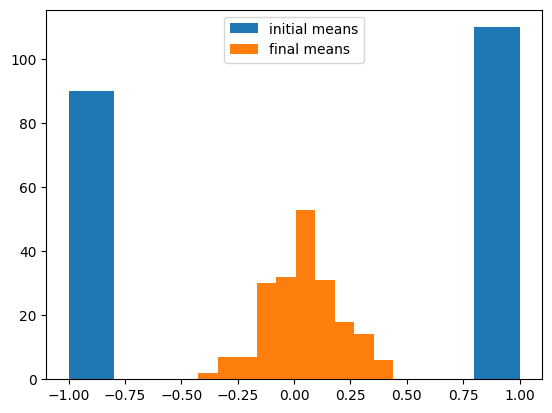

In [10]:
# Run a simulation with 200 agents and 2000 interactions

initial_population, new_population = simulate(200,2000)

print("The initial population was", initial_population)
print("The new population is", new_population)

# Plot the agents' initial and final means

%matplotlib inline 
# put plot in the notebook
import matplotlib.pyplot as plt # importing a plotting library
import seaborn as sns # make the plot look better

initial_means = []
final_means = []

for agent in range(len(initial_population)):
    initial_means.append(initial_population[agent][0])
    final_means.append(new_population[agent][0])
    
plt.hist(initial_means, label='initial means')
plt.hist(final_means, label='final means')
plt.legend(loc='upper center')
plt.show()

In [11]:
# Create a function to compute the means of the vowels in the population

def compute_mean(population):
    t=0.
    for agent in population:
        t += agent[0]
    return t/len(population)

# Create a function that runs multiuple simulations and returns the final mean of each of them

def batch_simulate(n,k,s): #n=pop size, k=no. of interactions, s=no. of simulations
    batch_final=[]
    for i in range(s):
        initial_population, new_population = simulate(n, k)
        new_proportion=compute_mean(new_population)
        batch_final.append(new_proportion)
    return batch_final
        

Text(0, 0.5, 'Number of Simulations')

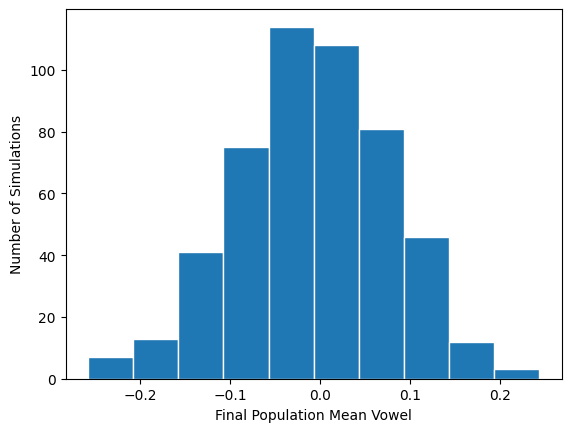

In [12]:
# Run 500 simulations
results = batch_simulate(200,2000,500)

# Plot the result

plt.hist(results, edgecolor = 'white')
plt.xlabel('Final Population Mean Vowel')
plt.ylabel('Number of Simulations')

In [13]:
# Modify the function to make populations of N agents with a given number of stubborn agents (st)

def make_population_biased(N,st):
    
    population = []
    
    for i in range(st):
        
        m = random.randint(0,1)
        
        agent = make_agent(vowel_means[m], personalities[1])
        
        population.append(agent)
    
    for i in range(N-st):
        
        m = random.randint(0,1)
        
        agent = make_agent(vowel_means[m], personalities[0])
        
        population.append(agent)

    return population


In [14]:
# Modify the function so that it calls our biased population 

def simulate_biased(n, k, st):  #st=no. of stubborn
    
    initial_population = make_population_biased(n,st)
    population=deepcopy(initial_population)
    
    for i in range(k):
        
        agent1, agent2 = choose_pair(population)
        
        interact(agent1, agent2)
        
    return initial_population, population

The initial population was [[-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [-1.0, 'S'], [1.0, 'S'], [1.0, 'S'], [-1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [-1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [-1.0, 'F'], [1.0, 'F'], [1.

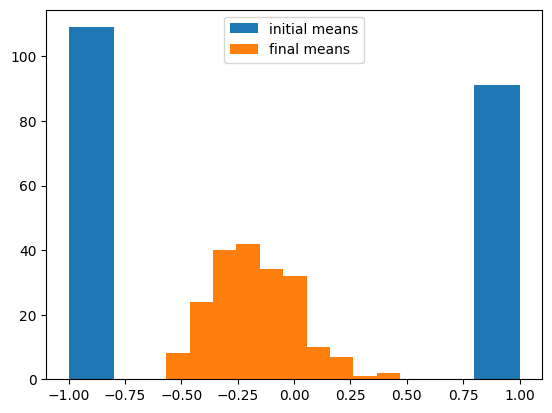

In [15]:
# Simulate a population with 50 stubborn agents
old_pop, new_pop =simulate_biased(200,2000,50)

print("The initial population was", old_pop)
print("The new population is", new_pop)

# Plot the agents' initial and final means

initial_means = []
final_means = []

for agent in range(len(old_pop)):
    initial_means.append(old_pop[agent][0])
    final_means.append(new_pop[agent][0])
    
plt.hist(initial_means, label='initial means')
plt.hist(final_means, label='final means')
plt.legend(loc='upper center')
plt.show()  

In [16]:
# Create a function to compute the means of the vowels in the population

def compute_SD(population):
    pop_means=[]
    for agent in population:
        pop_means.append(deepcopy(agent[0]))
    pop_SD= numpy.std(pop_means)
    return pop_SD

# Rewrite the batch simulation function so that it runs s simulations for each possible proportion of stubborn agents (possible_sts)

def batch_simulate_biased(n,k,s): #n-pop size, k=no. of interactions, s=no. of simulations for each bias
    
    all_results=[]
    
    possible_sts = [0, int(n / 10.), int(n / 4.), int(n / 2.), int(3*n / 4.), n]
    # This time, we'll test 0%, 10%, 25%, 50%, 75% and 100% stubborn agents
    
    for st in possible_sts:
        
        print(st)
    
        current_results = []  # print the progress of the simulations 
    
        for i in range(s):
            initial_population, new_population = simulate_biased(n, k, st)
            sd = compute_SD(new_population)
            current_results.append(sd)
        
        all_results.append([st,current_results])
    
    return all_results

In [17]:
# Run 50 simulations of each stubborness proportions in a community of 200 agents 
results = batch_simulate_biased(200,2000,50)

0
20
50
100
150
200


In [18]:
# Run 50 simulations of each stubborness proportions in a community of 200 agents 
results = batch_simulate_biased(100,1000,50)

0
10
25
50
75
100


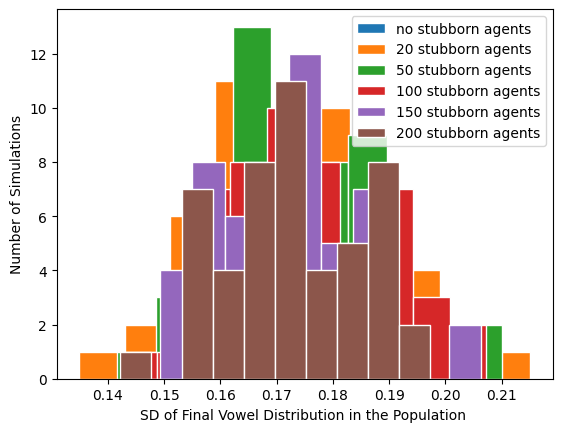

In [19]:
# Plot the results of the simulations 
        
plt.hist(results[0][1], label='no stubborn agents',edgecolor = 'white')
plt.hist(results[1][1], label='20 stubborn agents',edgecolor = 'white')
plt.hist(results[2][1], label='50 stubborn agents',edgecolor = 'white')
plt.hist(results[3][1], label='100 stubborn agents',edgecolor = 'white')
plt.hist(results[4][1], label='150 stubborn agents',edgecolor = 'white')
plt.hist(results[5][1], label='200 stubborn agents',edgecolor = 'white')
plt.legend(loc='best')
plt.xlabel('SD of Final Vowel Distribution in the Population ')
plt.ylabel('Number of Simulations')     
plt.show()  

In [20]:
# Rewrite the batch simulation function so that it runs s simulations for each possible population size (possible_size)

def batch_simulate_size(k,s): # k=no. of interactions, s=no. of simulations for each bias
    
    all_results=[]
    
    possible_size = [50, 150, 250, 350, 450, 550, 650]
        
    for n in possible_size:
        
        print(n)
    
        current_results = []  # print the progress of the simulations 
    
        for i in range(s):
            initial_population, new_population = simulate(n, k)
            sd = compute_SD(new_population)
            current_results.append(sd)
        
        all_results.append([n,current_results])
    
    return all_results

In [21]:
# Run 50 simulations of each population size
results = batch_simulate_size(2000,50)

50
150
250
350
450
550
650


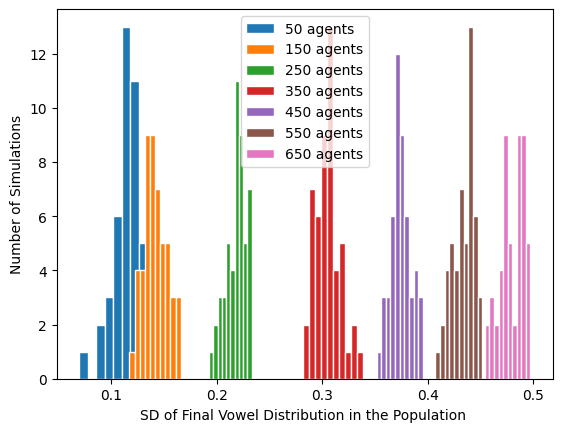

In [22]:
# Plot the results of the simulations 
        
plt.hist(results[0][1], label='50 agents',edgecolor = 'white')
plt.hist(results[1][1], label='150 agents',edgecolor = 'white')
plt.hist(results[2][1], label='250 agents',edgecolor = 'white')
plt.hist(results[3][1], label='350 agents',edgecolor = 'white')
plt.hist(results[4][1], label='450 agents',edgecolor = 'white')
plt.hist(results[5][1], label='550 agents',edgecolor = 'white')
plt.hist(results[6][1], label='650 agents',edgecolor = 'white')
#plt.hist(results[7][1], label='1000 agents',edgecolor = 'white')
plt.legend(loc='best')
plt.xlabel('SD of Final Vowel Distribution in the Population ')
plt.ylabel('Number of Simulations')     
plt.show()  

In [23]:
# Run 50 simulations of each population size
results = batch_simulate_size(10000,50)

50
150
250
350
450
550
650


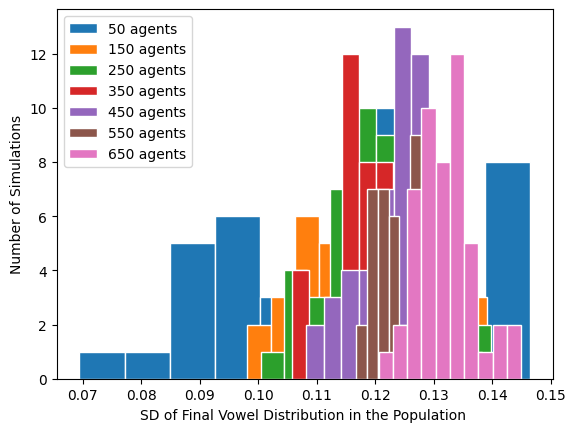

In [24]:
# Plot the results of the simulations 
        
plt.hist(results[0][1], label='50 agents',edgecolor = 'white')
plt.hist(results[1][1], label='150 agents',edgecolor = 'white')
plt.hist(results[2][1], label='250 agents',edgecolor = 'white')
plt.hist(results[3][1], label='350 agents',edgecolor = 'white')
plt.hist(results[4][1], label='450 agents',edgecolor = 'white')
plt.hist(results[5][1], label='550 agents',edgecolor = 'white')
plt.hist(results[6][1], label='650 agents',edgecolor = 'white')
#plt.hist(results[7][1], label='1000 agents',edgecolor = 'white')
plt.legend(loc='best')
plt.xlabel('SD of Final Vowel Distribution in the Population ')
plt.ylabel('Number of Simulations')     
plt.show()

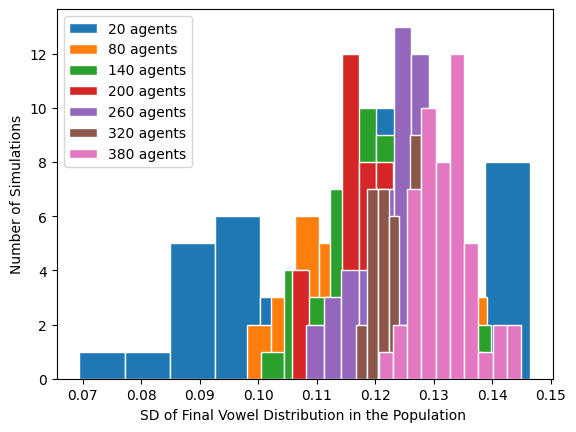

In [25]:
# Plot the results of the simulations 
        
plt.hist(results[0][1], label='20 agents',edgecolor = 'white')
plt.hist(results[1][1], label='80 agents',edgecolor = 'white')
plt.hist(results[2][1], label='140 agents',edgecolor = 'white')
plt.hist(results[3][1], label='200 agents',edgecolor = 'white')
plt.hist(results[4][1], label='260 agents',edgecolor = 'white')
plt.hist(results[5][1], label='320 agents',edgecolor = 'white')
plt.hist(results[6][1], label='380 agents',edgecolor = 'white')
#plt.hist(results[7][1], label='100 agents',edgecolor = 'white')
plt.legend(loc='best')
plt.xlabel('SD of Final Vowel Distribution in the Population ')
plt.ylabel('Number of Simulations')     
plt.show()